<a href="https://colab.research.google.com/github/sashank1326/ML_Practice/blob/main/Assign1_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/housing.csv")
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [ ]:

X = df[['median_income']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)


 # Predicting on the test set
y_pred = model.predict(X_test)

 # Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

# Coefficient (m) and Intercept (c)
m = model.coef_[0]
c = model.intercept_


# Create a DataFrame with YrSold, actual, and predicted prices
results_df = X_test.copy()
results_df['Actual_SalePrice'] = y_test.values
results_df['Predicted_SalePrice'] = y_pred

# Print the resulting DataFrame
print(results_df.head(10))  # print first 10 rows

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"Coefficient (m): {m}")
print(f"Intercept (c): {c}")

       median_income  Actual_SalePrice  Predicted_SalePrice
5344          5.2954          485100.0        267289.667305
10800         6.5928          439100.0        321661.018750
6180          3.5536          207000.0        194294.430720
13524         1.7456           86800.0        118524.889011
1547          6.2631          266000.0        307843.973451
4214          2.1071          208900.0        133674.606560
12774         1.8792           63300.0        124123.788775
8211          2.0186          130000.0        129965.754546
16989         7.2477          376000.0        349106.523653
6042          2.6250           94300.0        155378.724729
MSE: 6749934545.365595
MAE: 61645.19128699959
RMSE: 82157.98528058971
R^2: 0.46429003614309405
Coefficient (m): 41907.932360637824
Intercept (c): 45370.40228275815


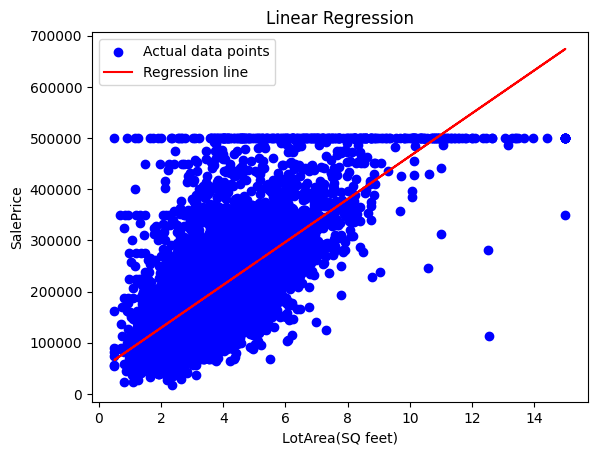

In [ ]:
# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('LotArea(SQ feet)')
plt.ylabel('SalePrice')
plt.title('Linear Regression')
plt.legend()
plt.show()

# **Multi LR**

In [ ]:
# Features and target
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame(X_test, columns=X.columns)
results_df['Actual_HouseValue'] = y_test.values
results_df['Predicted_HouseValue'] = y_pred

print(results_df.head(10))


   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                25.0       1505.0      537.870553      1392.0       359.0   
1                30.0       2943.0      537.870553      1565.0       584.0   
2                52.0       3830.0      537.870553      1310.0       963.0   
3                17.0       3051.0      537.870553      1705.0       495.0   
4                34.0       2351.0      537.870553      1063.0       428.0   
5                12.0       4427.0      537.870553      2400.0       843.0   
6                36.0       1375.0      537.870553       670.0       221.0   
7                38.0       1335.0      537.870553      1011.0       269.0   
8                 4.0       2292.0      537.870553      1050.0       584.0   
9                45.0       2332.0      537.870553       943.0       339.0   

   median_income  Actual_HouseValue  Predicted_HouseValue  
0         1.6812            47700.0         101486.000559  
1         2.5313     

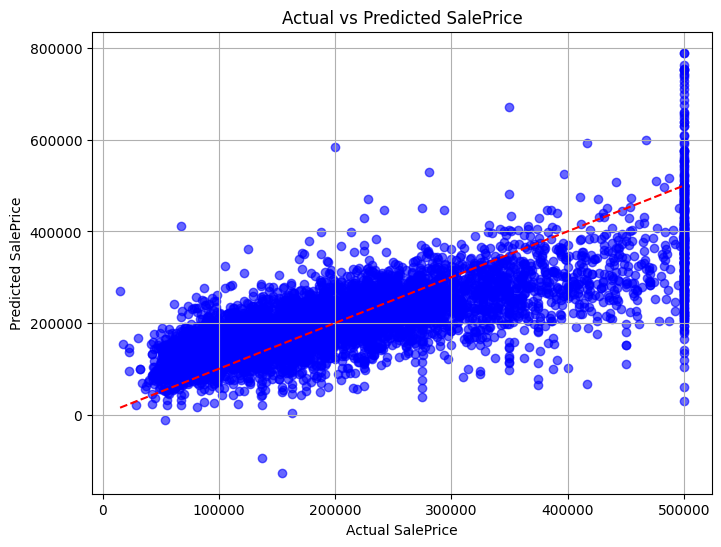

In [ ]:
#plotting

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.grid(True)
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Feature: median_income (or any other numeric feature)
X = df[['median_income']]

# Convert ocean_proximity to binary target: Near Bay = 1, others = 0
y = df['ocean_proximity'].apply(lambda x: 1 if x == 'NEAR BAY' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Create results DataFrame
results_df = X_test.copy()
results_df['Actual_Near_Bay'] = y_test.values
results_df['Predicted_Near_Bay'] = y_pred

# Print results
print(results_df.head(30))

# Accuracy
accuracy_score = metrics.accuracy_score(y_test, y_pred) * 100
print("ACCURACY", accuracy_score)


       median_income  Actual_Near_Bay  Predicted_Near_Bay
10997         3.5387                0                   0
17837         6.6086                0                   0
13822         3.6333                0                   0
1951          2.8807                0                   0
16954         5.4351                0                   0
1155          3.0446                0                   0
20028         1.8857                0                   0
18415         5.0186                0                   0
19582         2.0385                0                   0
2913          4.6705                0                   0
5154          1.7167                0                   0
8121          1.7938                0                   0
11090         5.0605                0                   0
16488         3.7687                0                   0
10083         4.7917                0                   0
18039         7.8407                0                   0
10297         

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


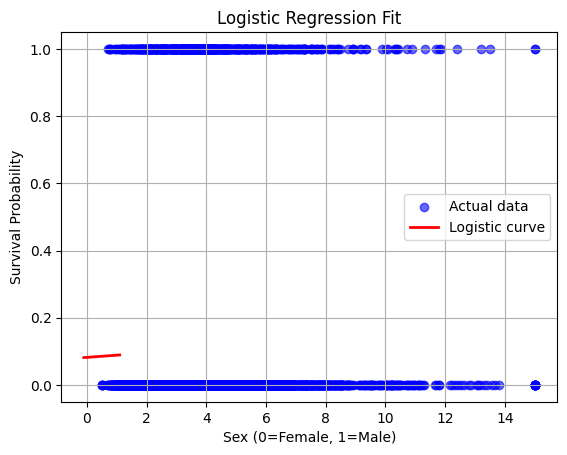

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate values for Sex (0 and 1)
X_vals = np.linspace(-0.1, 1.1, 300).reshape(-1,1)  # small buffer for smooth curve

# Predict probabilities
y_probs = model.predict_proba(X_vals)[:,1]

# Plot actual data
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual data')

# Plot logistic regression curve
plt.plot(X_vals, y_probs, color='red', linewidth=2, label='Logistic curve')

plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Survival Probability')
plt.title('Logistic Regression Fit')
plt.legend()
plt.grid(True)
plt.show()
